In [1]:
from obspy import read, UTCDateTime
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pywt 
from scipy import stats
import scipy 


In [2]:
# Leer datos del csv
df = pd.read_csv("/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/VT_P_training.csv")
df.head()

,eve_fecha,archivo,lec_p
0,2024-04-01 03:55:42.000,4010355,1.711944e+09
1,2024-04-01 09:19:05.000,4010919,1.711963e+09
2,2024-04-01 09:36:45.000,4010936,1.711964e+09
3,2024-04-01 17:49:27.000,4011749,1.711994e+09
4,2024-04-02 01:30:23.000,4020130,1.712021e+09


In [3]:
file_name = 4020130
p_time = UTCDateTime(float(df.loc[df['archivo'] == file_name, 'lec_p'].values[0]))
print(p_time)

2024-04-02T01:30:35.380000Z


In [4]:
# Leer y normalizar la señal sismica 
st = read(f"/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/train/0{file_name}.mseed")
tr = st[0]
data_normalized = (tr.data - np.mean(tr.data)) / np.std(tr.data)

In [5]:
# Configuración de tiempo 
start_time = tr.stats.starttime
samplig_rate = tr.stats.sampling_rate
npts = tr.stats.npts
times_relative = np.arange(0, npts) / samplig_rate


arrival seconds: 11.45
Tiempo de llegada P: 2024-04-02 01:30:35.380000
Segundos desde el inicio de la señal: 11.45


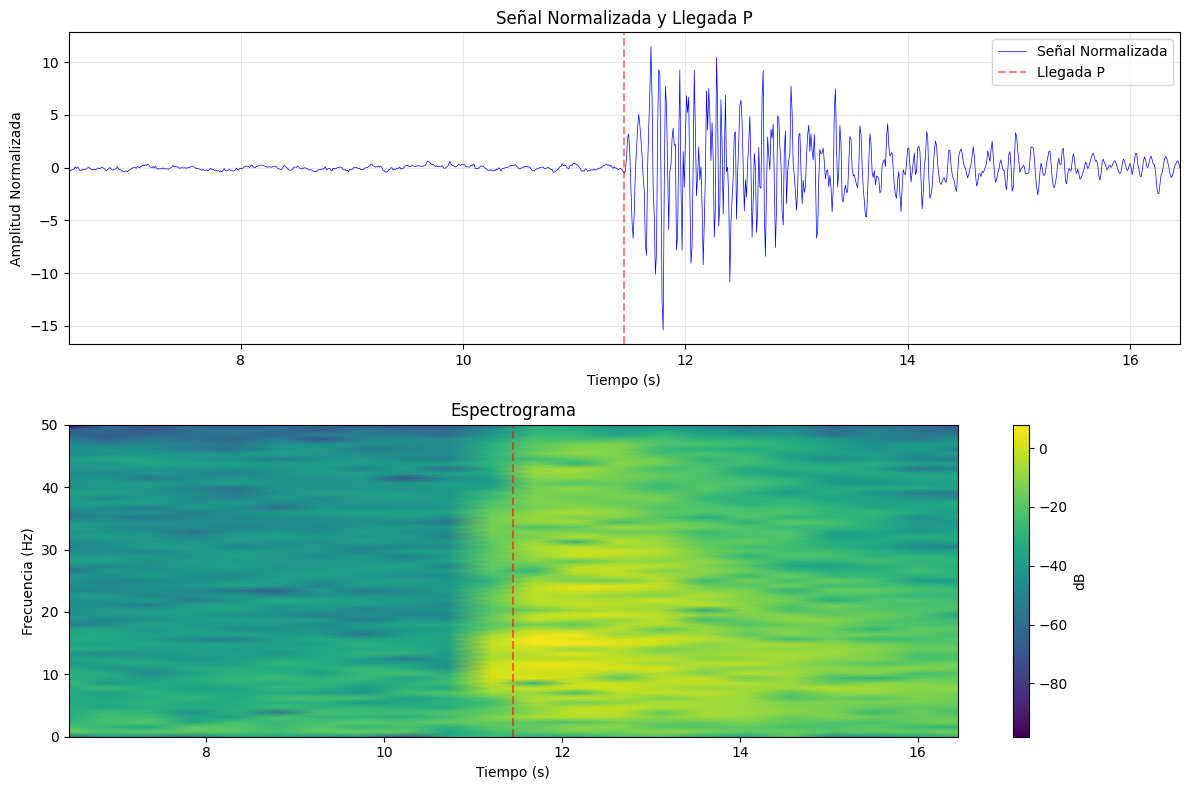

In [6]:
# Calcular espectograma 
f, t, Sxx = scipy.signal.spectrogram(data_normalized, fs=samplig_rate, nperseg=128, noverlap=80)

# Visualización

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Señal normalizada y llegada P
ax1.plot(times_relative, data_normalized, 'b-', linewidth=0.5, label='Señal Normalizada')
arrival_seconds = p_time - start_time
ax1.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
ax1.set_title('Señal Normalizada y Llegada P')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud Normalizada')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Espectograma 
im = ax2.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
ax2.set_title('Espectrograma')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Frecuencia (Hz)')
fig.colorbar(im, ax=ax2, label='dB')

# Marcar legada P en el espectrograma
ax2.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)

# Ajustar visualización
window = 5
ax1.set_xlim(arrival_seconds - window, arrival_seconds + window)
ax2.set_xlim(arrival_seconds - window, arrival_seconds + window)

plt.tight_layout()

# Información del tiempo de llegada 
print(f"arrival seconds: {arrival_seconds}")
print(f"Tiempo de llegada P: {p_time.strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"Segundos desde el inicio de la señal: {arrival_seconds:.2f}")



Tiempo de llegada P: 2024-04-01 03:55:51.400000
Segundos desde el inicio de la señal: 9.07


<Figure size 640x480 with 0 Axes>